In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [82]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_labels.csv")
sample_submissions_df = pd.read_csv("sample_submission.csv")

(array([[144277.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  15294.],
        [157976.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,   1595.],
        [151122.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,   8449.],
        [159093.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,    478.],
        [151694.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,   7877.],
        [158166.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,   1405.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 6 BarContainer objects>)

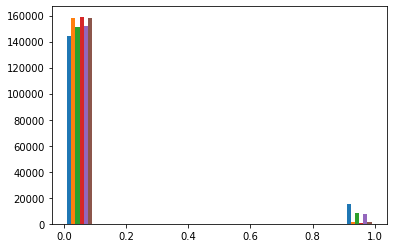

In [83]:
plt.hist([train_df.toxic, train_df.severe_toxic, train_df.obscene, train_df.threat, train_df.insult, train_df.identity_hate])

In [84]:
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [85]:
X_dtm = vect.fit_transform(train_df.comment_text.values.astype('U'))
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3228494 stored elements in Compressed Sparse Row format>

In [86]:
test_x_dtm = vect.fit_transform(test_df.comment_text.values.astype('U'))
test_x_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2668361 stored elements in Compressed Sparse Row format>

In [87]:
clf1 = XGBClassifier(use_label_encoder= False, eval_metric='logloss', objective= 'binary:logistic')
clf2 = LGBMClassifier()

In [88]:
cols_target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [94]:
test_df_lgbm = test_df
test_df_xgb = test_df

In [95]:
for label in cols_target:
    clf1.fit(X_dtm, train_df[label])
    train_pred = clf1.predict(X_dtm)
    test_acc = accuracy_score(train_df[label], train_pred)
    print(f"Training accuracy is : {test_acc}")
    test_pred = clf1.predict(test_x_dtm)
    test_df_xgb[label] = test_pred

Training accuracy is : 0.9605128751464865
Training accuracy is : 0.9941718733353805
Training accuracy is : 0.9848656710805849
Training accuracy is : 0.9986275701725251
Training accuracy is : 0.9772891064165794
Training accuracy is : 0.9949238896792023


In [105]:
test_df_xgb.drop(columns=['comment_text']).to_csv('result_xgb.csv')

In [106]:
for label in cols_target:
    clf2.fit(X_dtm, train_df[label])
    train_pred = clf2.predict(X_dtm)
    train_acc = accuracy_score(train_df[label], train_pred)
    print(f"Training accuracy is : {test_acc}")
    test_pred = clf2.predict(test_x_dtm)
    test_df_lgbm[label] = test_pred

Training accuracy is : 0.9949238896792023
Training accuracy is : 0.9949238896792023
Training accuracy is : 0.9949238896792023
Training accuracy is : 0.9949238896792023
Training accuracy is : 0.9949238896792023
Training accuracy is : 0.9949238896792023


In [107]:
test_df_lgbm.drop(columns=['comment_text']).to_csv('result_lgbm.csv')